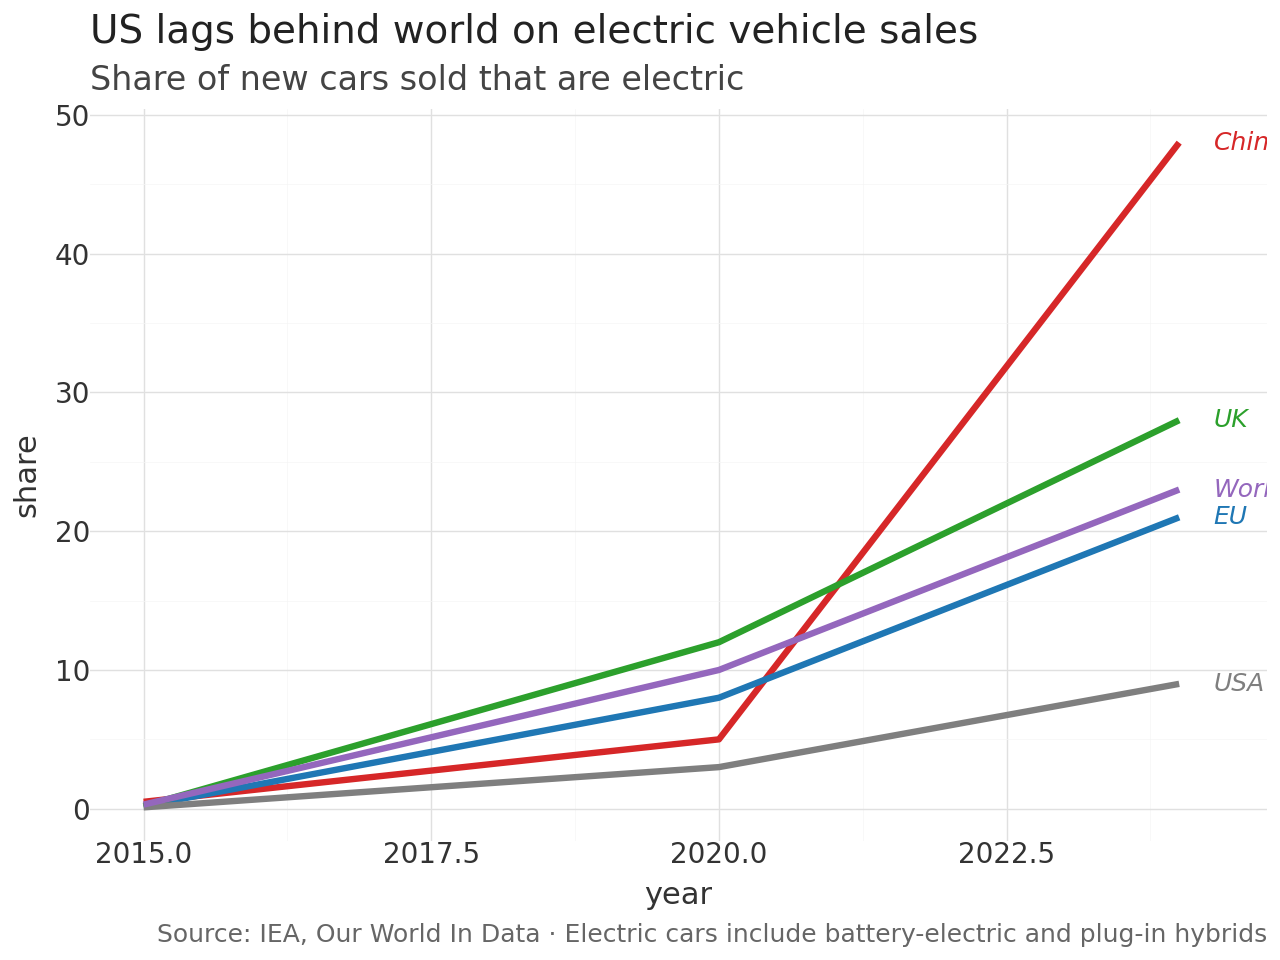

In [1]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_line, geom_text,
    labs, theme_minimal, theme, element_text, element_line, scale_color_manual
)

# Example data (simplified from your chart)
data = {
    "year": [2015, 2020, 2024] * 5,
    "country": ["China"] * 3 + ["UK"] * 3 + ["World"] * 3 + ["EU"] * 3 + ["USA"] * 3,
    "share": [0.5, 5, 48, 0.2, 12, 28, 0.3, 10, 23, 0.2, 8, 21, 0.1, 3, 9]
}
df = pd.DataFrame(data)

# Pick BBC-like colors
colors = {
    "China": "#d62728",
    "UK": "#2ca02c",
    "World": "#9467bd",
    "EU": "#1f77b4",
    "USA": "#7f7f7f"
}

bbc_style = (
    theme_minimal(base_family="DejaVu Sans", base_size=12)
    + theme(
        panel_grid_major=element_line(color="#e0e0e0", size=0.5),
        panel_grid_minor=element_line(color="#f5f5f5", size=0.25),
        axis_title=element_text(size=11, color="#333333"),
        axis_text=element_text(size=10, color="#333333"),
        plot_title=element_text(size=14, weight="normal", color="#222222"),
        plot_subtitle=element_text(size=12, color="#444444"),
        plot_caption=element_text(size=9, color="#666666"),
        legend_position="none",
    )
)

# Get latest year’s data for labels
latest = df.loc[df.groupby("country")["year"].idxmax()]

plot = (
    ggplot(df, aes("year", "share", color="country"))
    + geom_line(size=1.3)
    + geom_text(
        latest,
        aes(label="country"),
        ha="left", nudge_x=0.3, size=9, fontstyle="italic"
    )
    + scale_color_manual(values=colors)
    + labs(
        title="US lags behind world on electric vehicle sales",
        subtitle="Share of new cars sold that are electric",
        caption="Source: IEA, Our World In Data · Electric cars include battery-electric and plug-in hybrids",
        x=None, y=None
    )
    + bbc_style
)

display(plot)